---
title: Welcome to Lasers and Optomechanics!
date: 2025-01-12
authors:
  - name: Professor Craig Cahillane
    orcid: 0000-0002-3888-314X
    affiliations:
      - Syracuse University
---

In this course, we will overview the basics of optomechanics, lasers, and interferometers, 
with a focus on understanding optics lab components and gravitational wave detectors like Advanced LIGO.

## <span style="color: #9c9cff;">Course Topics</span>
1. Intro to Lasers
2. Plane Wave Mechanics and Interference
3. Interferometers
4. Gravitational Waves Detection
5. Geometric Optics
6. Transfer Functions
7. Control Systems

and more Special Topics, depending on the direction the class wants to go.


## <span style="color: #9c9cff;">Course Overview</span>

### Goals
A key component of this course will be familiarizing yourself with the latest interferometer simulation tools,
as well as understanding them analytically.
To do this effectively, we will need to rely on modern technical tools.
The hope of creating these interactive jupyter notebooks is to allow students in *Lasers and Optomechanics* to become familiar with tools used by actual 

### Textbooks
We will be relying on several texts and some video overviews
The major texts we will rely on are
1. *Lasers* by Seigman {cite}`Siegman_1986` [Free eBook](https://opg-optica-org.libezproxy2.syr.edu/content/bookshelf/book/item/lasers)
2. *Fundamentals Of Interferometric Gravitational Wave Detectors* by Saulson {cite}`Saulson_2017` [Syracuse Library Link](https://search.syr.edu/discovery/search?query=any,contains,fundamentals%20of%20interferometric%20gravitational%20wave%20detectors%20&tab=Everything&search_scope=MyInst_and_CI&sortby=date_d&vid=01SYU_INST:SYU&facet=frbrgroupid,include,9008347074956529785&lang=en&offset=0)
3. Some of the [*Feynman Lectures on Physics*](https://www.feynmanlectures.caltech.edu/)

Minor texts or articles will be clearly linked at the start of each lecture or homework as well.



### Videos
I have linked some useful optics videos in [](#videos).  
These are not required for class, but in some cases strongly recommended to quickly review course content.

## <span style="color: #9c9cff;">Prerequisites</span>

Students will be expected to have working knowledge of the following
1. Waves
2. Classical Mechanics
3. Complex Numbers
4. Laplace Transforms 
5. `python`

\begin{align}
\label{eq:force}
F &= ma
\end{align}

Testing a reference {ref}`eq:force`

In [5]:
%matplotlib widget
import numpy as np 
import matplotlib.pyplot as plt
from ipywidgets import *

interactive(children=(FloatSlider(value=1.0, description='ww', max=3.0, min=-1.0), FloatSlider(value=6.2831853…

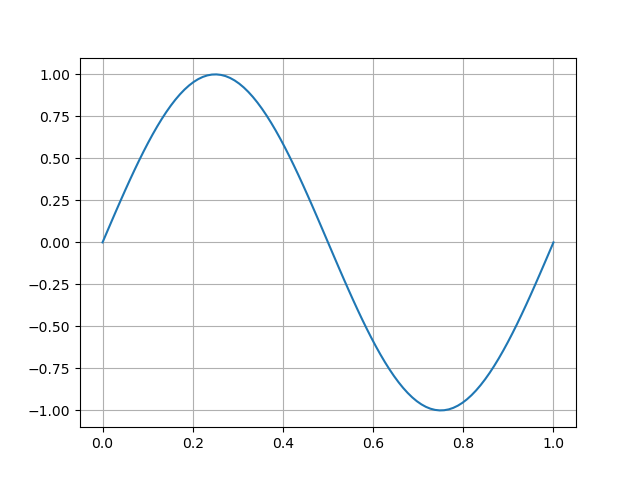

In [10]:
xx = np.linspace(0, 1, 100)
kk = 2 * np.pi 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(xx, np.sin(kk * xx))
ax.grid()

def update(ww = 1.0, theta = 2*np.pi):
    line.set_ydata(np.sin(ww  * kk * xx + theta))
    fig.canvas.draw_idle()

interact(update);